In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import cv2
import pandas as pd

### Loading Data

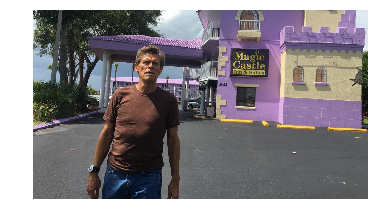

In [2]:
path = '../palette/images/florida.jpeg'
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure()
plt.axis('off')
plt.imshow(img)

### Clusterizing image
We choose the number of clusters and reshape the 4D image array to a 3D array for sklearn's KMeans


In [3]:
print(f"Image shape: {img.shape}")
height, width, _ = img.shape
print(f"Reshaped image: {img.reshape(height*width,3).shape}")

Image shape: (720, 1280, 3)
Reshaped image: (921600, 3)


In [4]:
num_clusters = 7
kmeans = KMeans(n_clusters=num_clusters, algorithm="elkan")
output = kmeans.fit((img.reshape(height*width,3)))

In [5]:
vars(output)

{'n_clusters': 7,
 'init': 'k-means++',
 'max_iter': 300,
 'tol': 0.0001,
 'precompute_distances': 'auto',
 'n_init': 10,
 'verbose': 0,
 'random_state': None,
 'copy_x': True,
 'n_jobs': None,
 'algorithm': 'elkan',
 'cluster_centers_': array([[ 94.9895786 ,  92.27270332,  95.9022756 ],
        [150.54050846, 130.44259497, 168.78122834],
        [ 26.33896972,  27.03656189,  27.92773958],
        [192.86650028, 176.61718026, 139.78823565],
        [118.81216984, 112.24232588, 117.36673214],
        [199.72386049, 200.41691287, 214.31752049],
        [ 61.25101785,  54.88009904,  53.51485672]]),
 'labels_': array([5, 4, 3, ..., 0, 0, 0], dtype=int32),
 'inertia_': 549943448.3019451,
 'n_iter_': 12}

In [6]:
centers = output.cluster_centers_
labels = output.labels_

# Normalize cluster centers' colors
cluster_colors = centers/255

### We create a dataframe with labels frequency
aka How many pixels correspond to each cluster color

In [7]:
df = pd.DataFrame(pd.Series(labels).value_counts())
df = df.transpose()
df

,0,4,2,1,6,3,5
0,246883,180230,156028,115419,102283,66930,53827


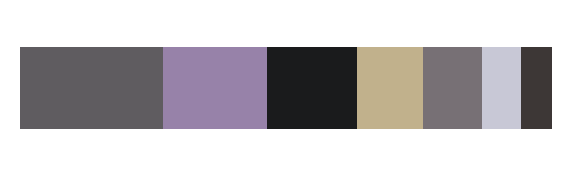

In [8]:
df.plot(kind="barh", stacked=True, legend=False, color = cluster_colors, figsize = (10,3));
plt.axis("off");

## Displaying color palette alongside image

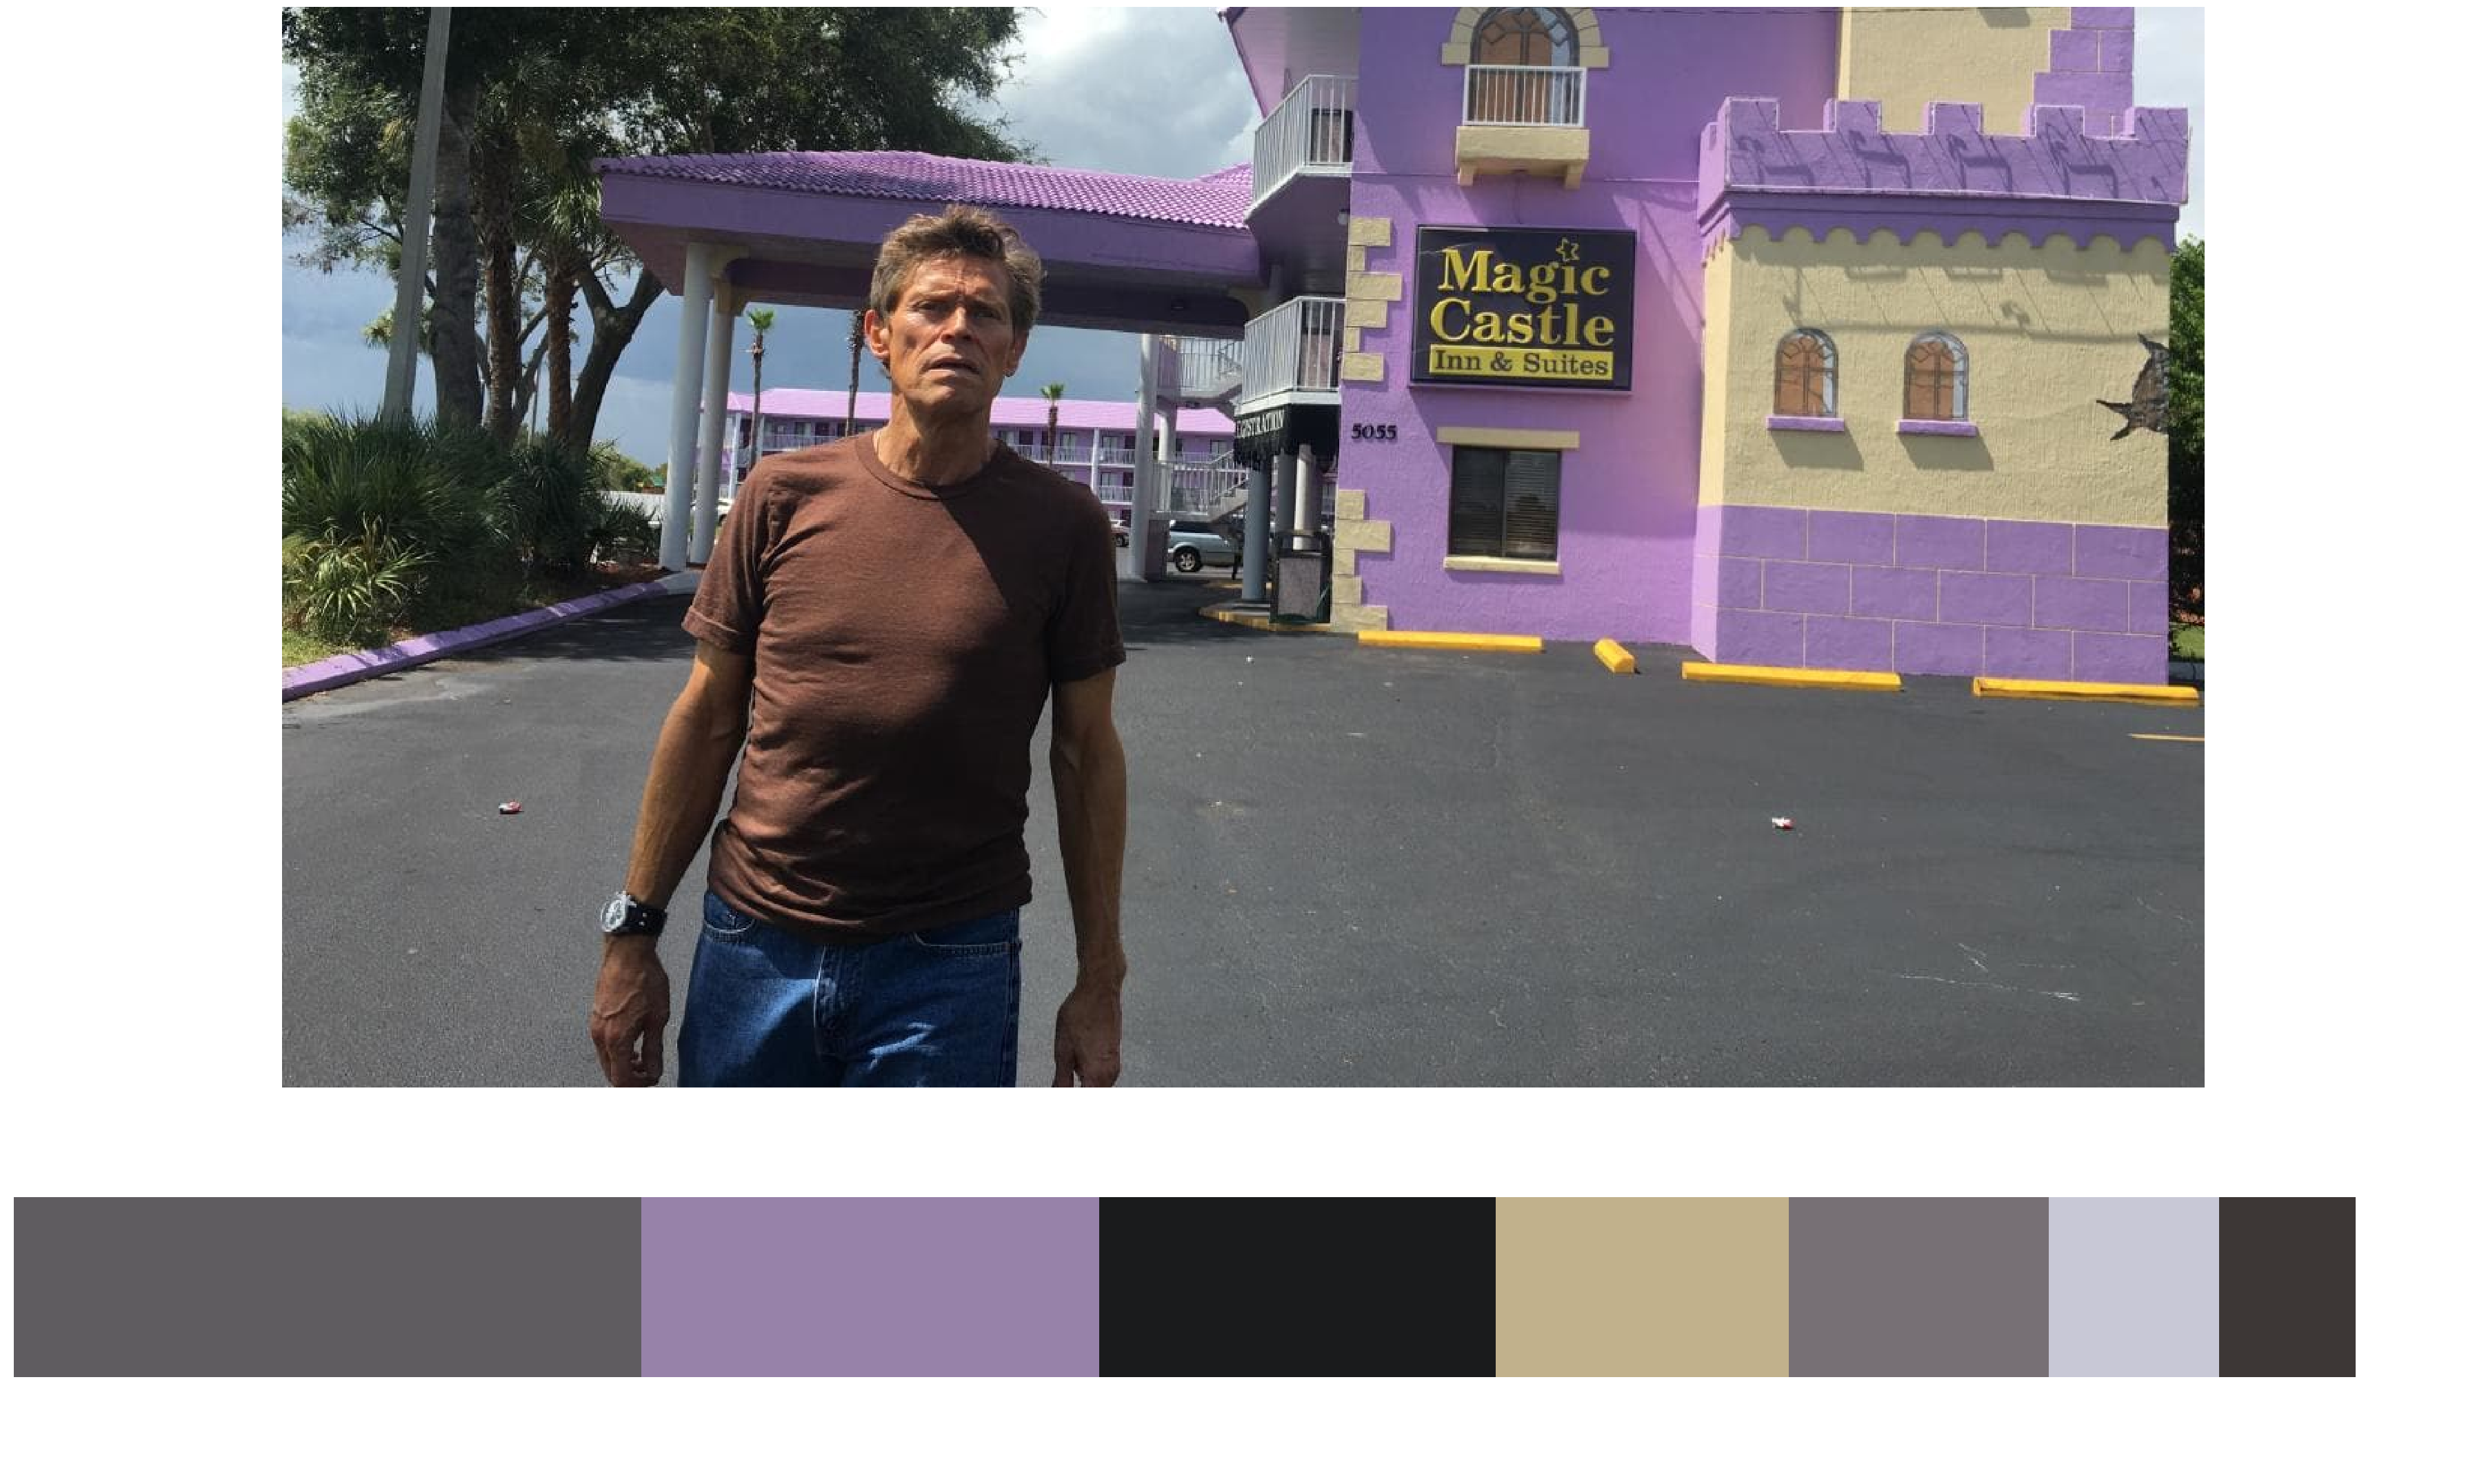

In [9]:
rows = 2
fig, axes = plt.subplots(rows, 1, figsize= (50,30), gridspec_kw = {'height_ratios':[30, 10]})
for i in range(rows):
    if i == 0:
        axes[0].imshow(img)
    else:
        df.plot(kind="barh", stacked=True, legend=False, color = cluster_colors, ax=axes[1] )
    axes[i].axis('off')
fig.tight_layout()